In [1]:
import numpy as np

def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced




In [51]:
import pandas as pd

dataset = pd.read_csv('archive543/CC GENERAL.csv')
dataset = dataset.drop(['CUST_ID'], axis=1)
dataset.dropna(inplace=True)
dataset

mat_reduced = PCA(dataset , 6)
principal_df = pd.DataFrame(mat_reduced)


<AxesSubplot:>

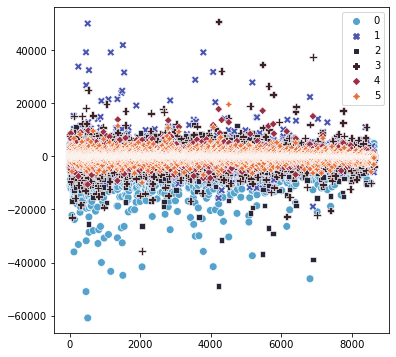

In [52]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df, s = 60 , palette= 'icefire')

0.9817614502028811
0.9743841294003849
0.9692682675447055
0.9659226604526171
0.9606836155380888
0.9575139461653184
0.9520415785941162
0.9467964110592866
0.9435445519317835
0.9395125816399567
0.9330383188106592
0.9357759148098189
0.9289878090775027
0.9290563333139574
0.9203108351491943
0.9208315705112649
0.9143173023056096
0.916120274065405
0.9130330102195172
0.9228273736895534


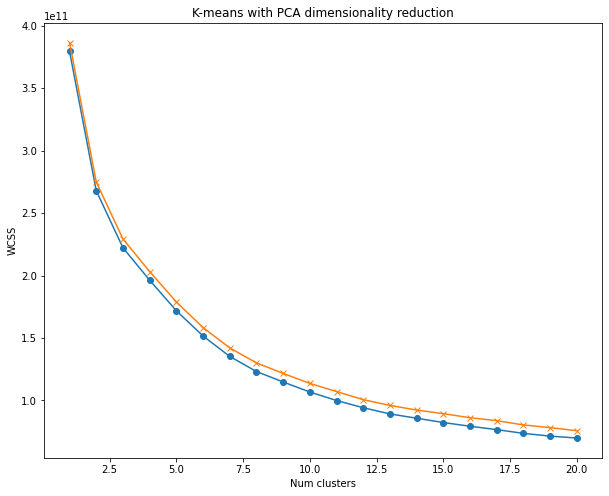

In [53]:
from sklearn.cluster import KMeans

wcss = []
wcss2 = []


for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans2_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(principal_df)
    kmeans2_pca.fit(dataset)
    wcss.append(kmeans_pca.inertia_)
    wcss2.append(kmeans2_pca.inertia_)
    print(wcss[i - 1] / wcss2[i - 1])
    

plt.figure(figsize = (10,8))
plt.plot(range(1, 21), wcss, marker= 'o', linestyle = '-')
plt.plot(range(1, 21), wcss2, marker= 'x', linestyle = '-')
plt.xlabel('Num clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA dimensionality reduction')
plt.show()

In [46]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data

dig_reduced = PCA(digits.data, 32)
dig_df = pd.DataFrame(dig_reduced)



C:\Users\john\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\john\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


0.9663542069634683
0.9620861622486193
0.958088178187455
0.9549813544063556
0.9525796332272428
0.9559190912965396
0.9461669130021478
0.9430455736736487
0.9403314101448426
0.937945077976055
0.9362273196573587
0.9388142823889343
0.9336146849528539
0.9322462601610441
0.9352247433173786
0.9297768613588867
0.9288668685818655
0.9287846667958387
0.9277156446755952
0.924327237045015
0.9232085420432642
0.9198399162268176
0.9197479062593109
0.9223695014577326
0.9227912690158401
0.9180740176080348
0.9178596436719335
0.9220153809745003
0.9216336029273692
0.9245197234341063


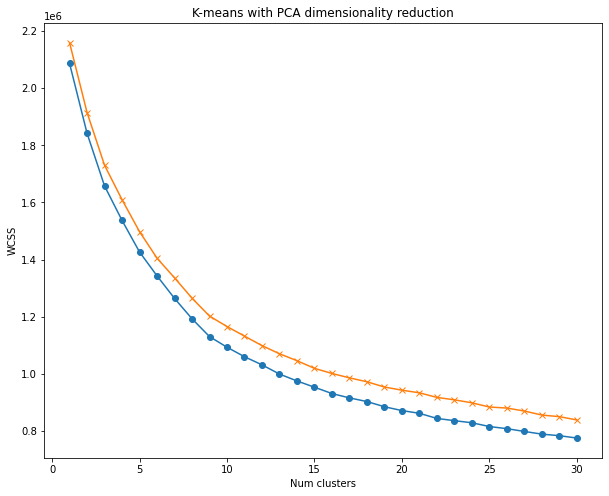

In [50]:
wcss = []
wcss2 = []


for i in range(1, 31):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans2_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(dig_df)
    kmeans2_pca.fit(digits.data)
    wcss.append(kmeans_pca.inertia_)
    wcss2.append(kmeans2_pca.inertia_)
    print(wcss[i - 1] / wcss2[i - 1])
    

plt.figure(figsize = (10,8))
plt.plot(range(1, 31), wcss, marker= 'o', linestyle = '-')
plt.plot(range(1, 31), wcss2, marker= 'x', linestyle = '-')
plt.xlabel('Num clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA dimensionality reduction')
plt.show()